<a href="https://colab.research.google.com/github/sagnikpal10/Mobile-Price-Classification-using-MLP/blob/master/Mobile_Price_Classification_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
dataset = pd.read_csv('train.csv')
print(dataset.head(10))

   battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1
5           1859     0          0.5  ...             0     0            1
6           1821     0          1.7  ...             0     1            3
7           1954     0          0.5  ...             1     1            0
8           1445     1          0.5  ...             0     0            0
9            509     1          0.6  ...             0     0            0

[10 rows x 21 columns]


In [4]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [0]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [6]:
print(X[0])

[8.420e+02 0.000e+00 2.200e+00 0.000e+00 1.000e+00 0.000e+00 7.000e+00
 6.000e-01 1.880e+02 2.000e+00 2.000e+00 2.000e+01 7.560e+02 2.549e+03
 9.000e+00 7.000e+00 1.900e+01 0.000e+00 0.000e+00 1.000e+00]


In [0]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
print(X[0])

[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]


In [9]:
#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [0]:
#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

In [11]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

Using TensorFlow backend.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 176us/step - loss: 1.4721 - accuracy: 0.2656 - val_loss: 1.3876 - val_accuracy: 0.3000
Epoch 2/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.3988 - accuracy: 0.3022 - val_loss: 1.3520 - val_accuracy: 0.3300
Epoch 3/100
1800/1800 [==============================] - 0s 21us/step - loss: 1.3531 - accuracy: 0.3367 - val_loss: 1.3217 - val_accuracy: 0.3600
Epoch 4/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.3132 - accuracy: 0.3800 - val_loss: 1.2853 - val_accuracy: 0.4100
Epoch 5/100
1800/1800 [==============================] - 0s 20us/step - loss: 1.2675 - accuracy: 0.4300 - val_loss: 1.2376 - val_accuracy: 0.4300
Epoch 6/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.2120 - accuracy: 0.4811 - val_loss: 1.1757 - val_accuracy: 0.5100
Epoch 7/100
1800/1800 [==============================] - 0s 21us/step - loss

In [0]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 92.5


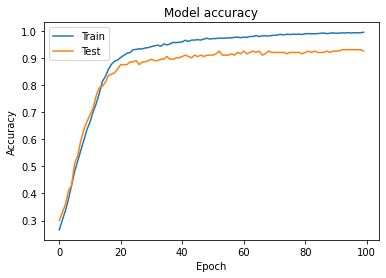

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

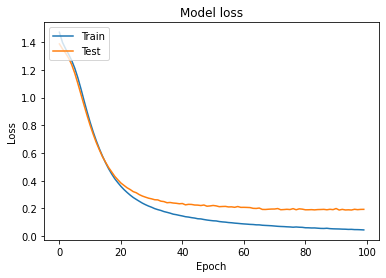

In [23]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()